<a href="https://colab.research.google.com/github/LMAPcoder/Machine-Learning-Lab/blob/main/Exercise_sheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Programming Machine Learning**

## Exercise Sheet 4

### Exercise 0: Dataset preprocessing

In [ ]:
#Required libraries
import pandas as pd
import numpy as np


In [ ]:
#Uploading the file from Google drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WNEEtNIEksk4xZT1x-u3QjhubXdCwB1n' -O tic-tac-toe.data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aMvRPtarsM56Y-izmf8lipC6N5RV7ySa' -O tic-tac-toe.names

--2021-12-10 17:50:54--  https://docs.google.com/uc?export=download&id=1WNEEtNIEksk4xZT1x-u3QjhubXdCwB1n
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.138, 74.125.204.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eq42b38te2u4pnithd8l4oosf0769kp2/1639158600000/14760575472933726065/*/1WNEEtNIEksk4xZT1x-u3QjhubXdCwB1n?e=download [following]
--2021-12-10 17:50:55--  https://doc-0o-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eq42b38te2u4pnithd8l4oosf0769kp2/1639158600000/14760575472933726065/*/1WNEEtNIEksk4xZT1x-u3QjhubXdCwB1n?e=download
Resolving doc-0o-ao-docs.googleusercontent.com (doc-0o-ao-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0o-ao-docs.googleusercontent.com (doc-0o-ao-d

In [ ]:
#Read a csv file into DataFrame
columns = ['top-left-square','top-middle-square','top-right-square','middle-left-square','middle-middle-square','middle-right-square',\
           'bottom-left-square','bottom-middle-square','bottom-right-square','Class']
tic_tac_toe = pd.read_csv('tic-tac-toe.data',names=columns)
print(tic_tac_toe)

    top-left-square top-middle-square  ... bottom-right-square     Class
0                 x                 x  ...                   o  positive
1                 x                 x  ...                   o  positive
2                 x                 x  ...                   x  positive
3                 x                 x  ...                   b  positive
4                 x                 x  ...                   b  positive
..              ...               ...  ...                 ...       ...
953               o                 x  ...                   x  negative
954               o                 x  ...                   x  negative
955               o                 x  ...                   x  negative
956               o                 x  ...                   x  negative
957               o                 o  ...                   x  negative

[958 rows x 10 columns]


In [ ]:
tic_tac_toe['Class'].value_counts()

positive    626
negative    332
Name: Class, dtype: int64

Unbalanced data set

An unbalanced dataset is one in which the target variable has more observations in one specific class than the others.
The algorithm receives significantly more examples from one class, prompting it to be biased towards that particular class. That is, to overfitting the majority class.

The most popular solution is to change the composition of the training dataset, through resampling. There are two main types of data sampling used:

*   Undersampling
*   Oversampling

**Oversampling** methods duplicate examples in the minority class or synthesize new examples from the examples in the minority class.

**Undersampling** methods delete or select a subset of examples from the majority class.

**Stratified sampling** is a method where the data set is split in subgroups, called strata, and ramdonmly sampling data from each stratum. With this method we can perform either oversampling or undersampling when we disproportionate sample the strata.

In [ ]:
np.random.seed(3116)
negative_stratum_size = 332
tic_tac_toe_resampled = tic_tac_toe.groupby('Class', group_keys=False).apply(lambda x: x.sample(negative_stratum_size)) #Undersampling positive class
print(tic_tac_toe_resampled)

    top-left-square top-middle-square  ... bottom-right-square     Class
944               x                 x  ...                   x  negative
928               b                 b  ...                   o  negative
775               o                 x  ...                   o  negative
827               o                 o  ...                   b  negative
853               o                 b  ...                   o  negative
..              ...               ...  ...                 ...       ...
562               b                 o  ...                   b  positive
124               x                 o  ...                   x  positive
351               o                 x  ...                   o  positive
622               b                 b  ...                   o  positive
389               o                 o  ...                   x  positive

[664 rows x 10 columns]


Convert any non-numeric values to numeric values

In [ ]:
#In this cell, we convert from categorical to numeric value only the output variable to prevent it from being affected by get_dummies method
tic_tac_toe_resampled['Class'] = tic_tac_toe_resampled['Class'].astype('category')
tic_tac_toe_resampled['Class'] = tic_tac_toe_resampled['Class'].cat.codes
print(tic_tac_toe_resampled['Class'])

944    0
928    0
775    0
827    0
853    0
      ..
562    1
124    1
351    1
622    1
389    1
Name: Class, Length: 664, dtype: int8


In [ ]:
tic_tac_toe_dumm = pd.get_dummies(tic_tac_toe_resampled) #One-Hot Encoding is used
print(tic_tac_toe_dumm)

     Class  top-left-square_b  ...  bottom-right-square_o  bottom-right-square_x
944      0                  0  ...                      0                      1
928      0                  1  ...                      1                      0
775      0                  0  ...                      1                      0
827      0                  0  ...                      0                      0
853      0                  0  ...                      1                      0
..     ...                ...  ...                    ...                    ...
562      1                  1  ...                      0                      0
124      1                  0  ...                      0                      1
351      1                  0  ...                      1                      0
622      1                  1  ...                      1                      0
389      1                  0  ...                      0                      1

[664 rows x 28 columns]


Split of the data set

In [ ]:
np.random.seed(3116) #to set the pseudo ramdom number generator
ratio = 0.8 #percentage of the data used for training the model
N, M = tic_tac_toe_dumm.shape
ridx = np.random.permutation(N) #to assure a uniform distribution of the instances in both the training and the data sets
split = int(N*ratio)
data_train = tic_tac_toe_dumm.iloc[ridx[:split]]
data_test = tic_tac_toe_dumm.iloc[ridx[split:]]

print(data_train['Class'].value_counts())
print(data_test['Class'].value_counts())

output = 'Class'
X_train = data_train.drop(output,axis=1).to_numpy()
Y_train = data_train[output].to_numpy().reshape(-1,1)
X_test = data_test.drop(output,axis=1).to_numpy()
Y_test = data_test[output].to_numpy().reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

1    266
0    265
Name: Class, dtype: int64
0    67
1    66
Name: Class, dtype: int64
(531, 27)
(133, 27)


### Exercise 1: Logistic Regression with Gradient Ascent

Logistic regression

Logistic regression is a method to solve binary classification problems thorugh linear regression.

Predicted output:
\begin{align}
p(y=1|\mathbf{x},\boldsymbol{\theta}) = \sigma (x^T \theta) = \frac{e^{x^T \theta}}{1+e^{x^T \theta}}
\end{align}
Performance function:
\begin{align}
L_{cll}(\theta) = \log p(y_1,...,y_N|x_1,...,x_N ,\theta) = \log \prod_{n=1}^{N} p(y_n|x_n,\theta) = \sum_{n=1}^{N} y_n x_n^T \theta - \log (1+e^{x_n^T \theta})
\end{align}
**Gradient ascent**
\begin{align}
\theta^{(k+1)} = \theta^{(k)} + \eta \nabla L_{cll}(\theta^{(k)})
\end{align}
Where:
\begin{align}
\nabla L_{cll} (\theta) = \sum_{n=1}^{N} x_n (y_n - \frac{e^{x_n^T \theta}}{1+e^{x_n^T \theta}})
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Gradient ascent function
def GA(X_tr,Y_tr,X_ts,Y_ts,eta,i_max):
  N, M = X_tr.shape
  theta = np.zeros(M) #initial theta
  L_tr = Lcll(X_tr,Y_tr,theta)
  error = np.zeros(i_max)
  L_ts = np.zeros(i_max)
  lr = np.zeros(i_max+1)
  lr[0] = eta
  for i in range(i_max):
    L_tr_old = L_tr
    g = gradient(X_tr,Y_tr,theta) #gradient
    sd =  g #search direction
    theta += lr[i] * sd
    L_tr = Lcll(X_tr,Y_tr,theta) #Log likelihood on train data
    error[i] = abs(L_tr - L_tr_old) #Absolute error
    lr[i+1] = Bd(lr[i],L_tr,g,X_tr,Y_tr,theta) #new learning rate
    L_ts[i] = Lcll(X_ts,Y_ts,theta) #Log likelihood on test data
  return [theta,error,L_ts,lr]

In [ ]:
#Gradient calculator
def gradient(X,Y,theta):
  N, M = X.shape
  grad = np.zeros(M)
  for n in range(N):
    grad += X[n] * (Y[n]-σ(X[n],theta))
  return grad

# gradiente = lambda X,y,theta: X.T@(y-σ(X,theta))

In [ ]:
#Sigmoid
σ = lambda x,theta: np.exp(x@theta)/(1+np.exp(x@theta))
# σ = lambda x,theta: 1/(1+np.exp(-x@theta)) does not work

In [ ]:
#Conditional likelihood function
def Lcll(X,Y,theta):
  N = len(X)
  L = 0
  for n in range(N):
    L += Y[n]*X[n]@theta - np.log(1+np.exp(X[n]@theta))
  return L

In [ ]:
#Bolddriver step controller
def Bd(lr,L,g,X,Y,theta):
  lr = lr * 1.01
  i = 0
  while L > Lcll(X,Y,theta + lr * g):
    lr = lr * 0.5
    i += 1
    if i > 100:
      break
  return lr

In [ ]:
#Parameters of the model
result_1 = GA(X_train,Y_train,X_test,Y_test,0.001,1000)
print(result_1[0])

[ 0.3694355  -9.05085902  7.51345786  0.48491159 -8.80200587  7.14912862
  0.5604615  -9.21855996  7.4901328   0.53942651 -9.13103669  7.42364451
  0.53299247 -9.51086129  7.80990316  0.3665609  -8.69126672  7.15674016
  0.47285645 -9.22578787  7.58496576  0.33742394 -8.81859232  7.31320272
  0.33583177 -8.98804828  7.48425084]


Plots of error and logloss

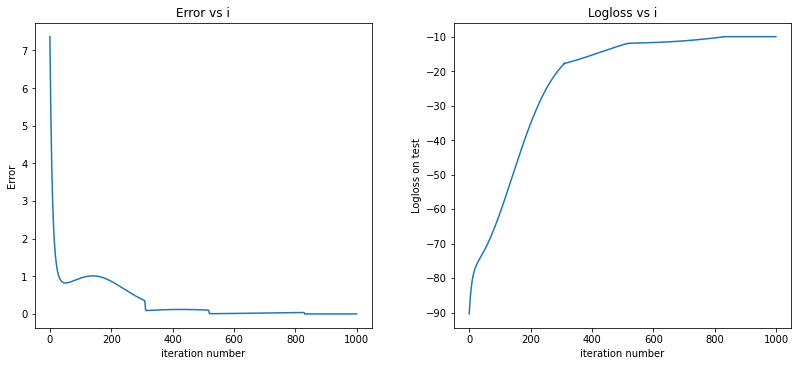

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
#plot error vs i
ax1.set_title("Error vs i")
ax1.set_xlabel("iteration number")
ax1.set_ylabel("Error")
xlist_1 = range(len(result_1[1]))
ylist_1 = result_1[1]
ax1.plot(xlist_1,ylist_1)

#plot logloss on test vs i
ax2.set_title("Logloss vs i")
ax2.set_xlabel("iteration number")
ax2.set_ylabel("Logloss on test")
xlist_2 = range(len(result_1[2]))
ylist_2 = result_1[2]
ax2.plot(xlist_2,ylist_2)

fig.set_figheight(6)
fig.set_figwidth(12)

plt.tight_layout(pad=4)
plt.show()

In [ ]:
# Classification Accuracy value
ca = lambda X,y,theta: 1 - np.mean(abs(y.flatten()-np.rint(σ(X,theta))))
ca(X_test,Y_test,result_1[0])

0.9774436090225564

### Exercise 2: Implement Newton Algorithm for Logistic Regression

**Newton method**
\begin{align}
\theta^{(k+1)} = \theta^{(k)} +^? \eta [\nabla^2 L_{cll}(\theta^{(k)})]^{-1} \nabla L_{cll}(\theta^{(k)})
\end{align}
Where:
\begin{align}
\nabla L_{cll} (\theta) = \sum_{n=1}^{N} x_n (y_n - \frac{e^{x_n^T \theta}}{1+e^{x_n^T \theta}})
\end{align}
\begin{align}
\nabla^2 L_{cll} (\theta) = H = -X^T diag[\mathbf{p} \odot (1-\mathbf{p})] X
\end{align}

In [ ]:
#Newton function
def newton(X_tr,Y_tr,X_ts,Y_ts,eta,i_max):
  N, M = X_tr.shape
  # theta = np.random.choice(1,M).astype(float) #draft
  theta = np.zeros(M) #initial theta
  # theta = np.array(result_1[0]) #draft
  L_tr = Lcll(X_tr,Y_tr,theta)
  error = np.zeros(i_max)
  L_ts = np.zeros(i_max)
  lr = np.zeros(i_max+1)
  lr[0] = eta
  for i in range(i_max):
    L_tr_old = L_tr
    g = gradient(X_tr,Y_tr,theta) #gradient
    h = hessian(X_tr,Y_tr,theta) #hessian
    # sd =  np.linalg.inv(h) @ g #search direction
    sd = g #search direction
    theta += lr[i] * sd
    L_tr = Lcll(X_tr,Y_tr,theta) #Log likelihood on train data
    error[i] = abs(L_tr - L_tr_old) #Absolute error
    # lr[i+1] = lr[i]
    lr[i+1] = Bd(lr[i],L_tr,g,X_tr,Y_tr,theta) #new learning rate using Bolddriver method
    L_ts[i] = Lcll(X_ts,Y_ts,theta) #Log likelihood on test data
  return [theta,error,L_ts,lr]

In [ ]:
#Hessian calculator
def hessian(X,Y,theta):
  N = len(X)
  p = np.zeros(N)
  for n in range(N):
    p[n] = σ(X[n],theta)
  W = np.diag(p*(1-p))
  hess = -X.T @ W @ X
  return hess

#Draft
# def hessian(X,Y,theta):
#   M = X.shape[1]
#   h = np.zeros((M,M))
#   for n in range(N):
#     h += -X[n].reshape(-1,1)@X[n].reshape(1,-1) *σ(X[n],theta)*(1-σ(X[n],theta))
#   return h

In [ ]:
#Parameters of the model
# np.random.seed(3116)
result_2 = newton(X_train,Y_train,X_test,Y_test,0.001,500)
print(result_2[0])

[ 0.19742373 -7.09643668  5.95402249  0.29851948 -6.83196698  5.58845705
  0.38968826 -7.28919947  5.95452076  0.34609578 -7.11087934  5.81979311
  0.35798325 -7.57639063  6.27341693  0.19252128 -6.7543132   5.61680146
  0.28984422 -7.25915872  6.02432405  0.16450919 -6.86196025  5.75246061
  0.16330107 -7.07368551  5.96539398]


Plots of error and logloss

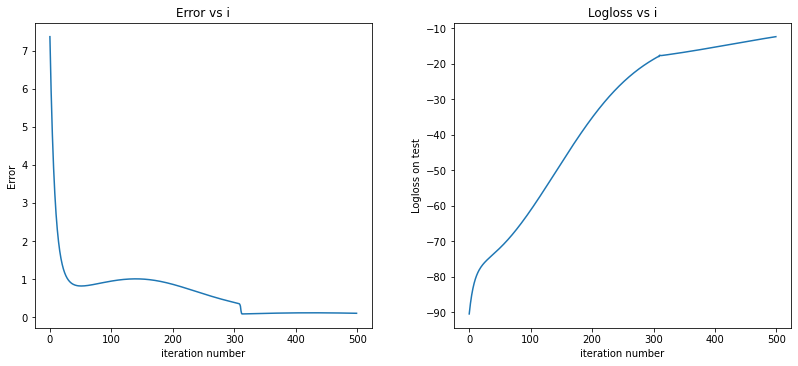

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
#plot error vs i
ax1.set_title("Error vs i")
ax1.set_xlabel("iteration number")
ax1.set_ylabel("Error")
xlist_1 = range(len(result_2[1]))
ylist_1 = result_2[1]
ax1.plot(xlist_1,ylist_1)

#plot logloss on test vs i
ax2.set_title("Logloss vs i")
ax2.set_xlabel("iteration number")
ax2.set_ylabel("Logloss on test")
xlist_2 = range(len(result_2[2]))
ylist_2 = result_2[2]
ax2.plot(xlist_2,ylist_2)

fig.set_figheight(6)
fig.set_figwidth(12)
# plt.autoscale(False)
plt.tight_layout(pad=4)
plt.show()

The newton method algorithm is slowly converging but I was not able to increase the number of iteration without getting the error Singular matrix